<a href="https://colab.research.google.com/github/Allekarthik/AIML_Projects_and_labs/blob/main/AIML%20III-Module_02_Lab%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".

In [2]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [4]:
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))

Number of data points = 205


In [5]:
data.replace("?", np.nan, inplace=True)
data = data.dropna()
print(len(data))

159


In [6]:
X = data.drop("price", axis=1)
y = pd.to_numeric(data["price"])

In [7]:
numeric_features = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                    'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                    'peak-rpm', 'city-mpg', 'highway-mpg']
X[numeric_features] = X[numeric_features].apply(pd.to_numeric)

In [8]:
correlations = X[numeric_features].corrwith(y)
print(correlations)

symboling           -0.162794
wheel-base           0.734419
length               0.760952
width                0.843371
height               0.244836
curb-weight          0.893639
engine-size          0.841496
bore                 0.533890
stroke               0.160664
compression-ratio    0.209361
horsepower           0.759874
peak-rpm            -0.171916
city-mpg            -0.692273
highway-mpg         -0.720090
dtype: float64


In [9]:
negative_corr_feature = correlations.idxmin()
print(f"Feature with the most negative correlation: {negative_corr_feature}")


Feature with the most negative correlation: highway-mpg


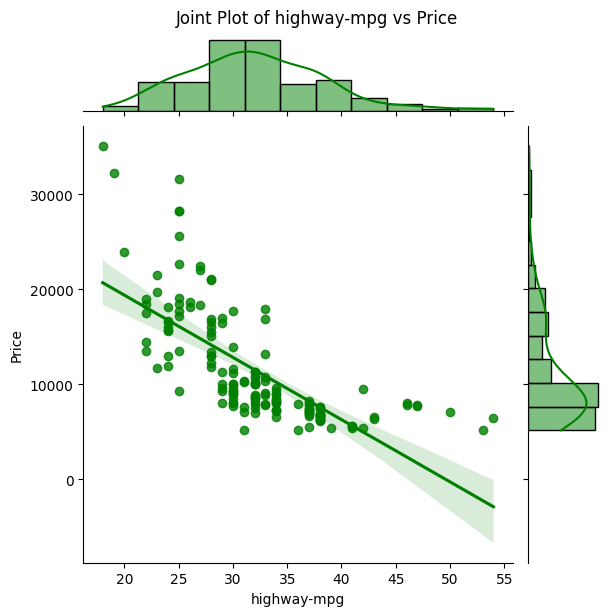

In [10]:
sns.jointplot(x=X[negative_corr_feature], y=y, kind="reg", color='green').set_axis_labels(negative_corr_feature, 'Price')
plt.suptitle(f'Joint Plot of {negative_corr_feature} vs Price', y=1.02)
plt.show()

Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

Number of data points = 205
159
    body-style  price
0  convertible  35056
3        sedan  32250
4        wagon  28248
1      hardtop  28176
2    hatchback  22018
The costliest body type is: convertible with a maximum price of $35056


<ipython-input-12-4628efa9b153>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="body-style", y="price", data=max_price_per_body_type, palette="viridis")


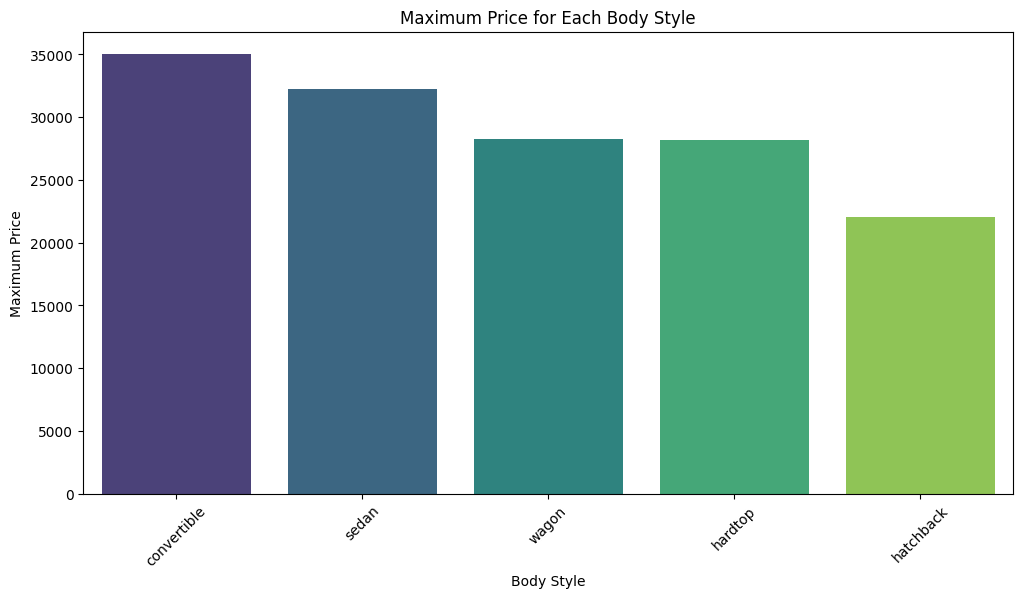

In [12]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

# Loading the dataset
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))

# Removing rows which have missing values
data.replace("?", np.nan, inplace=True)
data = data.dropna()
print(len(data))

# Converting "price" column to numeric
data["price"] = pd.to_numeric(data["price"])

# Grouping by "body-style" and finding the maximum price for each group
max_price_per_body_type = data.groupby("body-style")["price"].max().reset_index()
max_price_per_body_type = max_price_per_body_type.sort_values(by="price", ascending=False)
print(max_price_per_body_type)

# Identifying the costliest body type
costliest_body_type = max_price_per_body_type.iloc[0]
print(f"The costliest body type is: {costliest_body_type['body-style']} with a maximum price of ${costliest_body_type['price']}")

# Plotting the maximum price for each body type
plt.figure(figsize=(12, 6))
sns.barplot(x="body-style", y="price", data=max_price_per_body_type, palette="viridis")
plt.xlabel('Body Style')
plt.ylabel('Maximum Price')
plt.title('Maximum Price for Each Body Style')
plt.xticks(rotation=45)
plt.show()


The costliest body type is: convertible with a maximum price of $35056

Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

While maximum and minimum values provide some insight into the range of prices for different body types, they can be significantly affected by outliers. Therefore, considering the interquartile range (IQR) can provide a more robust understanding of the typical price distribution for each body type. The IQR, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile), helps to understand the spread of the middle 50% of the data, giving a clearer picture of the central tendency and variability.

3) Do you think the body-style of a car can be a good predictor for its price?

The body style of a car can provide some insight into its price, but it might not be the strongest predictor on its own. The relationship between body style and price can be influenced by various factors, including the brand, features, engine specifications, and market demand. To evaluate whether body style is a good predictor of price, we can look at the variance explained by body style compared to other features.

In [ ]:
1)Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.

Number of data points = 205
159


<ipython-input-13-99ee65531050>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"], y=y, palette="Set3", ax=ax[0])


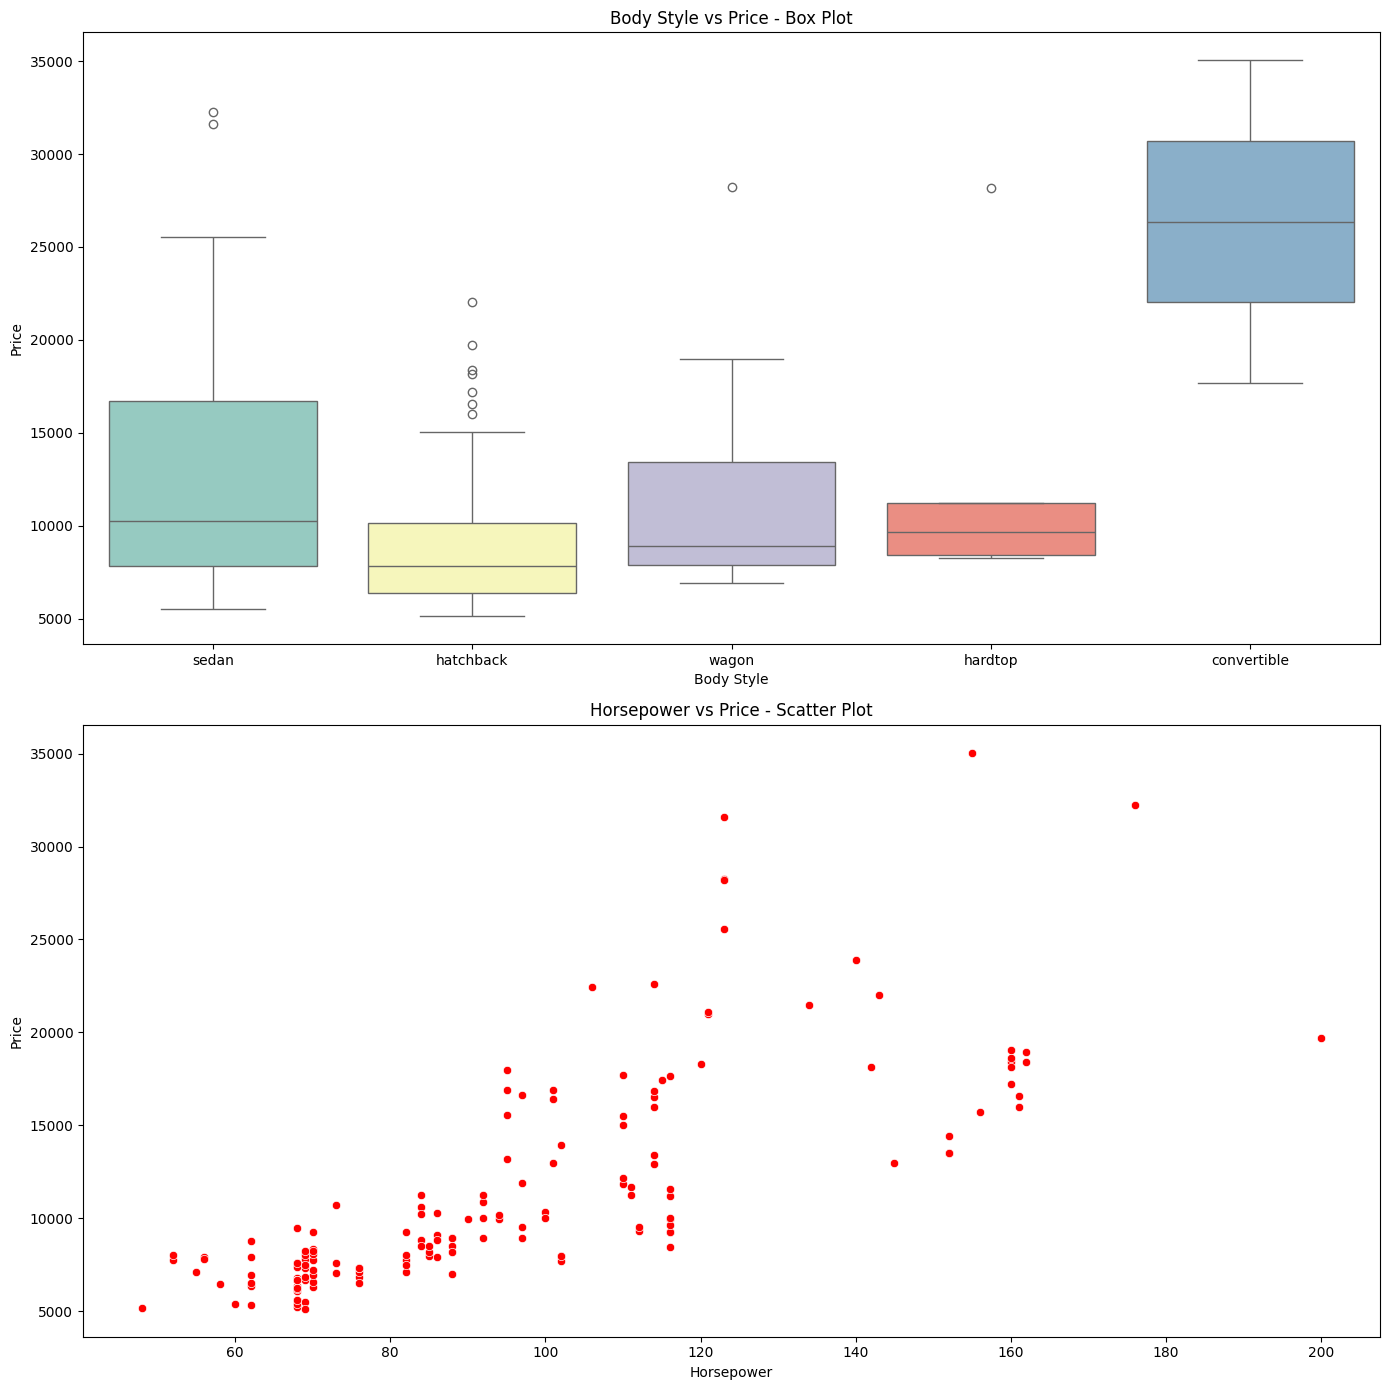

In [13]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))


data.replace("?", np.nan, inplace=True)
data = data.dropna()
print(len(data))


data["price"] = pd.to_numeric(data["price"])


numeric_features = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                    'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                    'peak-rpm', 'city-mpg', 'highway-mpg']
data[numeric_features] = data[numeric_features].apply(pd.to_numeric)

X = data.drop("price", axis=1)
y = data["price"]


fig, ax = plt.subplots(2, 1, figsize=(14, 14))


sns.boxplot(x=X["body-style"], y=y, palette="Set3", ax=ax[0])
ax[0].set_title('Body Style vs Price - Box Plot')
ax[0].set_xlabel('Body Style')
ax[0].set_ylabel('Price')


sns.scatterplot(x=X["horsepower"], y=y, color="red", ax=ax[1])
ax[1].set_title('Horsepower vs Price - Scatter Plot')
ax[1].set_xlabel('Horsepower')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()


Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

Number of data points = 205
159


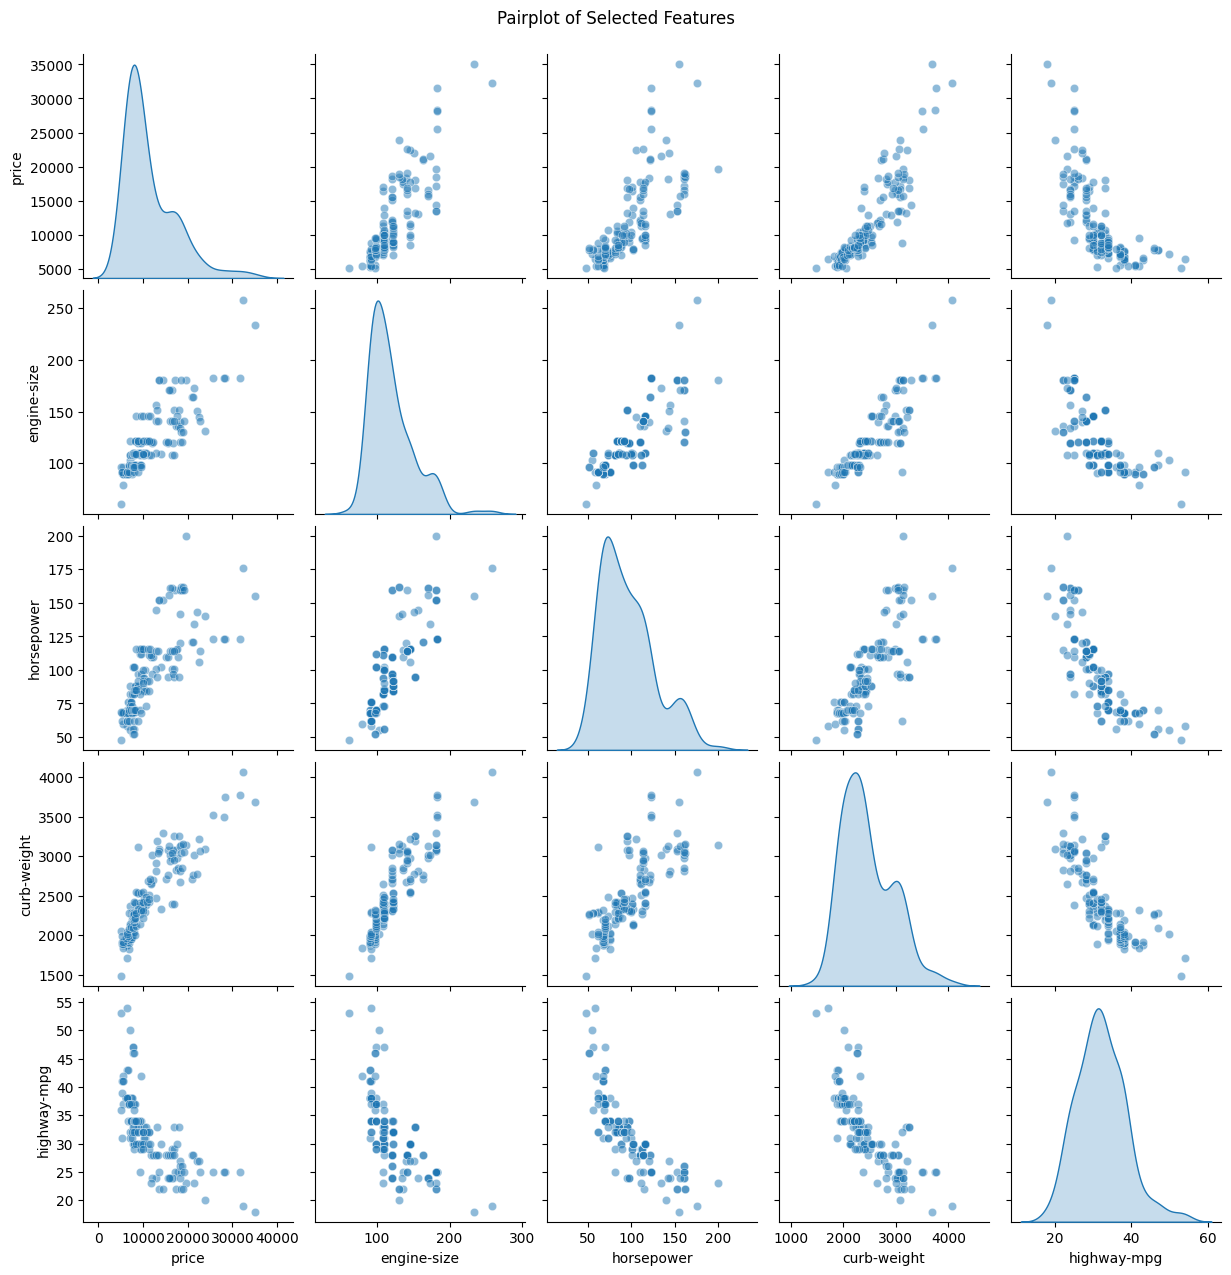

In [14]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))


data.replace("?", np.nan, inplace=True)
data = data.dropna()
print(len(data))


data["price"] = pd.to_numeric(data["price"])


numeric_features = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                    'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                    'peak-rpm', 'city-mpg', 'highway-mpg']
data[numeric_features] = data[numeric_features].apply(pd.to_numeric)


selected_features = ['price', 'engine-size', 'horsepower', 'curb-weight', 'highway-mpg']


sns.pairplot(data[selected_features], diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()
